# Aprendizaje automático
## Problema de Clasificación

### Ejemplo uso de aplicación de Inteligencia Artificial Explicable (XAI)

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: edad en años
- `sex`: sexo (1 = masculino; 0 = femenino)
- `cp`: tipo de dolor torácico (1: angina típica; 2: angina atípica; 3: dolor no anginoso; 4: asintomático)
- `trestbps`: presión arterial en reposo (en mm Hg al ingreso en el hospital)
- `chol`: colestoral sérico en mg/dl
- `fbs`: glucemia en ayunas > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resultados electrocardiográficos en reposo (0: normal; 1: anomalía de la onda ST-T; 2: hipertrofia ventricular izquierda probable o definitiva)
- `thalach`: frecuencia cardíaca máxima alcanzada
- `exang`: angina inducida por el ejercicio (1 = sí; 0 = no)
- `oldpeak`: Depresión del ST inducida por el ejercicio en relación con el reposo
- `slope`: la pendiente del segmento ST del ejercicio máximo (1: pendiente ascendente; 2: plano; 3: pendiente descendente)
- `ca`: número de vasos principales (0-3) coloreados por fluoroscopia
- `thal`: 3 = normales; 6 = defecto fijo; 7 = defecto reversible

Puede faltar datos en el conjunto de datos.

## Carga del conjunto de datos

Se carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Hay que eliminar a los pacientes que tengan datos incompletos.

In [1]:
import pandas as pd

#Crear dataframe
df = pd.read_csv('cleveland.csv')

df = df.dropna()
df = df.reset_index(drop=True)

#Indicar variables categóricas
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')

#Modificar columna target
df['target']= df['target'].replace([0],'normal')
df['target']= df['target'].replace([1,2,3,4],'enfermo')


df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


## Análisis de los datos

Hay que comprobar si las clases a predecir están equilibradas y explicar si debemos tenerlo en cuenta de algún modo.

Compruebar los rangos y distribuciones de las variables numéricas.

Estudiar las relaciones 2 a 2 de las variables numéricas. Luego dibujar el diagrama de dispersión y calcular los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [2]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


In [3]:
#Correlacion de Pearson
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


### Diagrama de Dispersión

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trestbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='thalach', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>,
        <AxesSubplot:xlabel='ca', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trestbps'>,
        <AxesSubplot:xlabel='trestbps', ylabel='trestbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trestbps'>,
        <AxesSubplot:xlabel='thalach', ylabel='trestbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trestbps'>,
        <AxesSubplot:xlabel='ca', ylabel='trestbps'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='trestbps', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='thalach', ylabel='chol'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='chol'>,
        <AxesSubplot:xlabel='ca', ylabel='chol'>],
       [<AxesSubplot:x

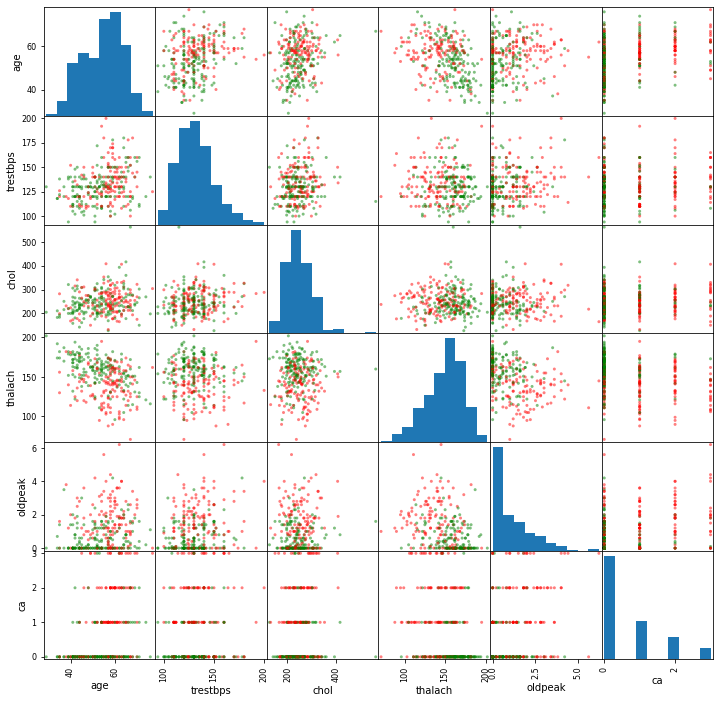

In [4]:
from pandas.plotting import scatter_matrix

dic_colors = { 'normal': 'green', 'enfermo': 'red' }
colors = df['target'].map(dic_colors)

scatter_matrix(df, figsize = (12, 12), diagonal = 'hist', color=colors)

## Profundidad óptima del árbol

Eligir razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que se van a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, se debe acceder al array interno del dataframe. Hay que crear un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.


In [5]:
RANDOM_STATE=333

In [6]:
# Acceder al array interno del dataframe
# Array con los datos de entrenamiento
trainingData = df.drop(['target'],axis=1).to_numpy()

# Array con la variable de salida
dfTarget = df['target']
#dfTarget = dfTarget.replace('enfermo',1)
#dfTarget = dfTarget.replace('normal', 0)
target = dfTarget.copy().to_numpy()

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import numpy as np

train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 10)
for md in max_depths: 
    # Creamos el clasificador k-NN
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    # Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
    scores = cross_validate(clf, trainingData, target, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9147059645592265,
  0.9495066800827324,
  0.9712085639219632,
  0.9843032030856952,
  0.9940172731846386],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7641379310344828,
  0.763793103448276,
  0.754367816091954,
  0.7677011494252873,
  0.7574712643678161,
  0.7573563218390804])

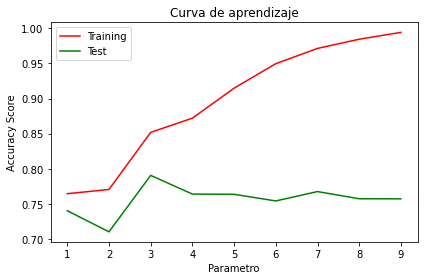

In [8]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [9]:
# Suponemos la siguiente combinación como la óptima
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
clf = clf.fit(trainingData, target)

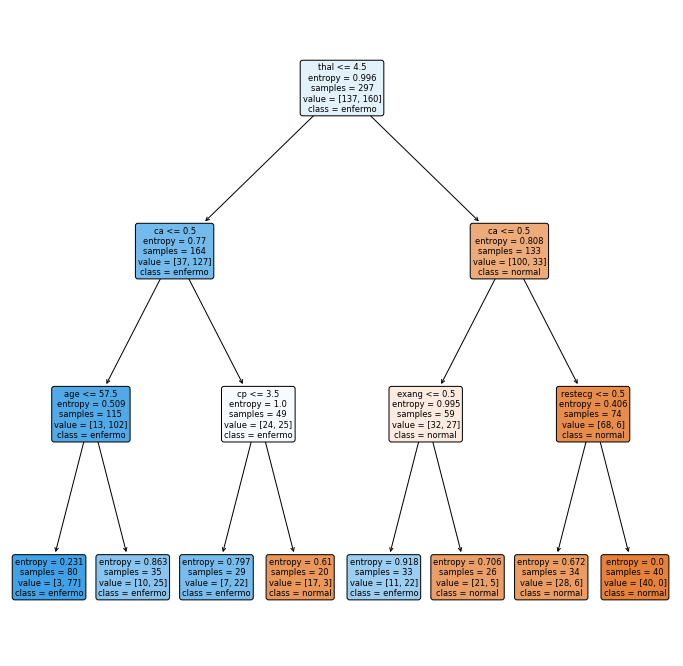

In [10]:
from sklearn.tree import plot_tree

# Pintamos el árbol
target_names = ['normal','enfermo']
feature_names = df.drop(['target'],axis=1).keys()

plt.figure(figsize=(12,12))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.show()

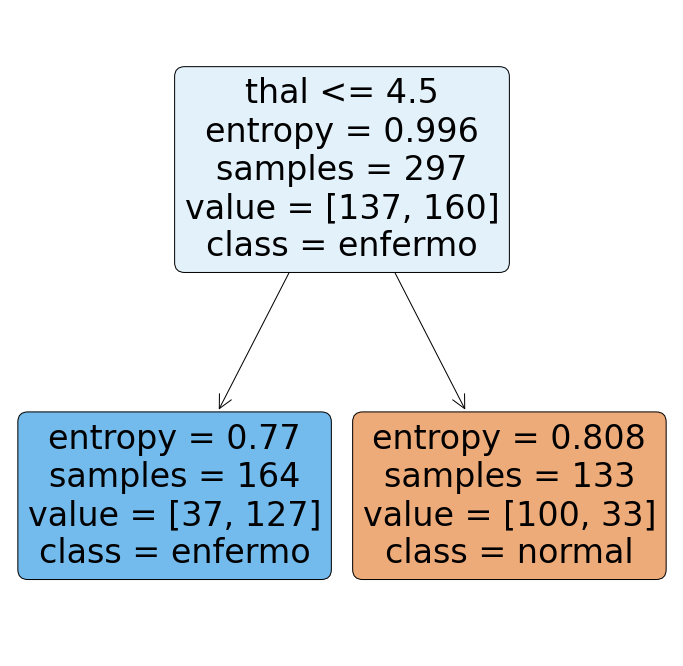

In [11]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=1, min_samples_split=10, random_state=RANDOM_STATE)
clf = clf.fit(trainingData, target)

plt.figure(figsize=(12,12))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.show()

# Estudiando el error

Calcular la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcular el informe detallado para cada una de las clases y dibujar la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [12]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, trainingData, target, scoring=scoring_metrics, cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, trainingData, target, cv=10)

# Informe por clases
cr = classification_report(target,predictions, target_names=['enfermo','normal'])
print(cr)

              precision    recall  f1-score   support

     enfermo       0.82      0.71      0.76       137
      normal       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



In [14]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 97  40]
 [ 22 138]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

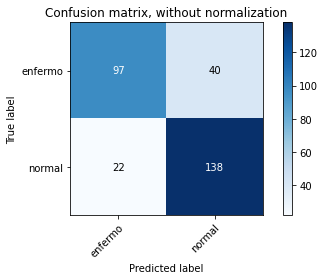

In [15]:
plot_confusion_matrix(target, predictions, ['enfermo', 'normal'], normalize=False)